In [6]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms

In [4]:
from torchvision import datasets
data_path = "data/"
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.RandomCrop(24),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.RandomCrop(24),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

# 1  
## (a)  

In [5]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


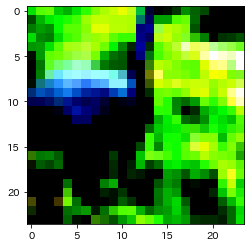

In [8]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

RandomCropを用いて、3/4の大きさにランダムでクロップした  
(正規化も相まって)なんの絵か全然認識できない  
  
## (b)

In [10]:
img_2 = transforms.RandomCrop(16)(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


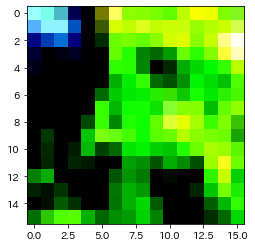

In [12]:
plt.imshow(img_2.permute(1, 2, 0))
plt.show()

もうなんなんだか全くわからない  

## (c)

In [13]:
model = nn.Sequential(
            nn.Linear(1728, 256),
            nn.Tanh(),
            nn.Linear(256, 2),
            nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # 最後の画像の損失を出力します
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 2.845694
Epoch: 1, Loss: 3.766783
Epoch: 2, Loss: 5.660944
Epoch: 3, Loss: 5.756959
Epoch: 4, Loss: 6.827988
Epoch: 5, Loss: 4.633684
Epoch: 6, Loss: 6.292463
Epoch: 7, Loss: 4.628064
Epoch: 8, Loss: 6.343484
Epoch: 9, Loss: 6.914026
Epoch: 10, Loss: 9.116515
Epoch: 11, Loss: 8.037664
Epoch: 12, Loss: 8.951804
Epoch: 13, Loss: 7.726115
Epoch: 14, Loss: 6.551840
Epoch: 15, Loss: 8.683052
Epoch: 16, Loss: 5.509545
Epoch: 17, Loss: 9.274029
Epoch: 18, Loss: 8.166529
Epoch: 19, Loss: 3.594916
Epoch: 20, Loss: 7.786989
Epoch: 21, Loss: 7.319813
Epoch: 22, Loss: 11.711759
Epoch: 23, Loss: 7.224668
Epoch: 24, Loss: 10.953800
Epoch: 25, Loss: 12.746353
Epoch: 26, Loss: 9.509359
Epoch: 27, Loss: 8.548038
Epoch: 28, Loss: 12.481115
Epoch: 29, Loss: 10.107695
Epoch: 30, Loss: 8.418998
Epoch: 31, Loss: 12.639508
Epoch: 32, Loss: 17.507740
Epoch: 33, Loss: 15.116771
Epoch: 34, Loss: 10.067011
Epoch: 35, Loss: 15.963444
Epoch: 36, Loss: 11.099911
Epoch: 37, Loss: 6.468123
Epoch: 38, 

In [14]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f", correct / total)

Accuracy: %f 0.732


大きく下がった

# 2
## (a)

In [15]:
from torchvision import datasets
data_path = "data/"
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

In [16]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

In [18]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]).float())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # 最後の画像の損失を出力します
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.250001
Epoch: 1, Loss: 0.250000
Epoch: 2, Loss: 0.250000
Epoch: 3, Loss: 0.250001
Epoch: 4, Loss: 0.250001
Epoch: 5, Loss: 0.250001
Epoch: 6, Loss: 0.250000
Epoch: 7, Loss: 0.250000
Epoch: 8, Loss: 0.250000
Epoch: 9, Loss: 0.250000
Epoch: 10, Loss: 0.250000
Epoch: 11, Loss: 0.250000
Epoch: 12, Loss: 0.250000
Epoch: 13, Loss: 0.250000
Epoch: 14, Loss: 0.250000
Epoch: 15, Loss: 0.250000
Epoch: 16, Loss: 0.250000
Epoch: 17, Loss: 0.250000
Epoch: 18, Loss: 0.250000
Epoch: 19, Loss: 0.250000
Epoch: 20, Loss: 0.250000
Epoch: 21, Loss: 0.250000
Epoch: 22, Loss: 0.250000
Epoch: 23, Loss: 0.250000
Epoch: 24, Loss: 0.250000
Epoch: 25, Loss: 0.250000
Epoch: 26, Loss: 0.250000
Epoch: 27, Loss: 0.250000
Epoch: 28, Loss: 0.250000
Epoch: 29, Loss: 0.250000
Epoch: 30, Loss: 0.250000
Epoch: 31, Loss: 0.250000
Epoch: 32, Loss: 0.250000
Epoch: 33, Loss: 0.250000
Epoch: 34, Loss: 0.250000
Epoch: 35, Loss: 0.250000
Epoch: 36, Loss: 0.250000
Epoch: 37, Loss: 0.250000
Epoch: 38, Loss: 0.250

In [19]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f", correct / total)

Accuracy: %f 0.518


# 3
## (a)

元々ネットワークの容量が少ないモデルなので、検証しない